In [1]:
from __future__ import unicode_literals
from IPython.display import Image

import pygraphviz

In [2]:
img_router = './img/router.jpg'
img_server = './img/server.jpg'
img_switch = './img/switch.jpg'
img_core_router = './img/core-router.jpg'


In [3]:
class TopoGraph():
    
    def __init__(self):
        g = pygraphviz.AGraph(directed=True, strict=True, encoding='UTF-8')
        self.g = g
        self.nodes = set([])
        
    def add_node(self, node_name, image):
        assert node_name not in self.nodes
        self.g.add_node(node_name, label='', image=image, shape='plaintext')
        self.nodes.add(node_name)
        return node_name
        
    def add_edge(self, source, target, *attrs, **kw):
        assert source in self.nodes, 'source not existed!'
        assert target in self.nodes, 'target not existed!'
        self.g.add_edge(source, target, *attrs, **kw)
        
    def draw(self, path):
        self.g.layout('dot')
        self.g.draw(path, format='jpg')
        
        

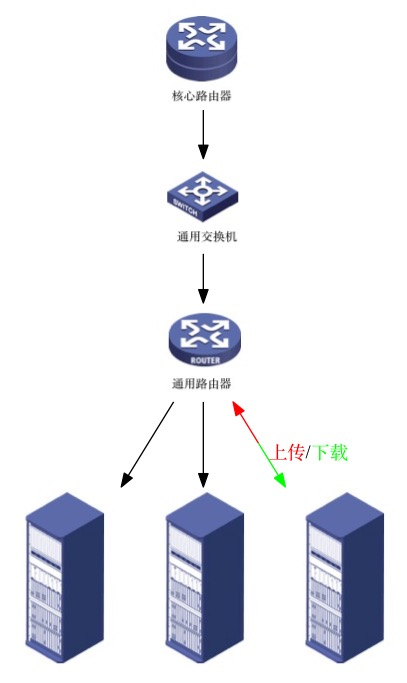

In [20]:
topo = TopoGraph()

topo.add_node('inet', image=img_core_router)
topo.add_node('switch_1', image=img_switch)
topo.add_node('route_1', image=img_router)
# server
topo.add_node('server_1', image=img_server)
topo.add_node('server_2', image=img_server)
topo.add_node('server_3', image=img_server)

topo.add_edge('inet', 'switch_1')
topo.add_edge('switch_1', 'route_1')
topo.add_edge('route_1', 'server_1')
topo.add_edge('route_1', 'server_2')
topo.add_edge('route_1', 'server_3', color='red:green;0.5', dir='both', label='<<BR/><FONT COLOR="red">上传</FONT>/<FONT COLOR="green">下载</FONT>>')

topo.draw('./topo.jpg')
Image('./topo.jpg')